In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout

Using TensorFlow backend.


In [3]:
df = pd.read_csv('train_kOBLwZA.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.drop(axis=1,columns=['Item_Identifier','Outlet_Identifier'],inplace = True)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df.describe()
#here min visiblity is 0 which does not make sense
#conisdering it still minimum lets replace that with 10 percentile

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [0]:
df['Item_Visibility'].replace(to_replace=0, value= df['Item_Visibility'].quantile(q=.10),inplace = True)

In [8]:
df.describe() #hence min is replaced

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066875,140.992782,1997.831867,2181.288914
std,4.643456,0.050719,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df['Item_Fat_Content'].value_counts()
#LF ~ Low Fat and reg ~ regular and low fat ~ Low Fat
#so replace them also

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [10]:
df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'},inplace = True)
df['Item_Fat_Content'].value_counts()
#Done

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [11]:
#lets handle null values now
#replacing missing weights with means
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)
df.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

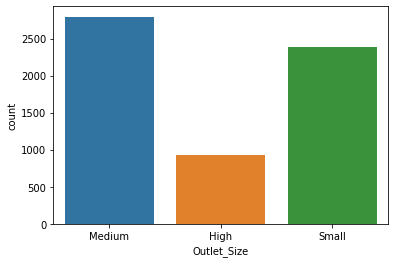

In [12]:
import seaborn as sns
sns.countplot(df['Outlet_Size'])

In [13]:
#lets replace NaN with Medium
df['Outlet_Size'].fillna(value='Medium',inplace = True)
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.012042,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.012042,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066875,140.992782,1997.831867,2181.288914
std,4.226124,0.050719,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
df['Outlet_Establishment_Year']=(2013-df['Outlet_Establishment_Year'])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,4,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.012042,Fruits and Vegetables,182.0950,15,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.012042,Household,53.8614,26,High,Tier 3,Supermarket Type1,994.7052


In [17]:
dummy = pd.get_dummies(df,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'],drop_first=True)
df = dummy
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,14,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,4,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,14,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,19.20,0.012042,182.0950,15,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,8.93,0.012042,53.8614,26,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0


In [0]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#df_scalled = pd.DataFrame(sc.fit_transform(df),columns=[x for x in df.columns])
#df_scalled.head()

In [0]:
#now all the preprocessing part is completed
#split data in X_train and y_train
X = df.drop(columns=['Item_Outlet_Sales']).values

In [20]:
X

array([[9.30000000e+00, 1.60473010e-02, 2.49809200e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.92000000e+00, 1.92782160e-02, 4.82692000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.75000000e+01, 1.67600750e-02, 1.41618000e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.06000000e+01, 3.51862710e-02, 8.51224000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.21000000e+00, 1.45220646e-01, 1.03133200e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.48000000e+01, 4.48782800e-02, 7.54670000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [21]:
y = df['Item_Outlet_Sales'].values
y

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [0]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [24]:
model = Sequential()

In [25]:
#Input Layer
model.add(Dense(128,kernel_initializer='normal',input_shape=(X_train.shape[1],),activation='relu'))

In [26]:
#Hidden Layers
model.add(Dense(256,kernel_initializer='normal',activation='relu'))
model.add(Dense(256,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,kernel_initializer='normal',activation='relu'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#Output Layer
model.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [28]:
#compile
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               3584      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 168,449
Trainable params: 168,449
Non-trainable params: 0
_______________________________________________

In [29]:
#training
model.fit(X_train,y_train,epochs=1000,batch_size=64,validation_split=0.2)




Train on 5113 samples, validate on 1279 samples
Epoch 1/1000





5113/5113 [==============================] - 2s 303us/step - loss: 0.5492 - mean_absolute_error: 0.5492 - val_loss: 0.4758 - val_mean_absolute_error: 0.4758
Epoch 2/1000
5113/5113 [==============================] - 0s 62us/step - loss: 0.4658 - mean_absolute_error: 0.4658 - val_loss: 0.4764 - val_mean_absolute_error: 0.4764
Epoch 3/1000
5113/5113 [==============================] - 0s 60us/step - loss: 0.4542 - mean_absolute_error: 0.4542 - val_loss: 0.4596 - val_mean_absolute_error: 0.4596
Epoch 4/1000
5113/5113 [==============================] - 0s 64us/step - loss: 0.4511 - mean_absolute_error: 0.4511 - val_loss: 0.4644 - val_mean_absolute_error: 0.4644
Epoch 5/1000
5113/5113 [==============================] - 0s 60us/step - loss: 0.4395 - mean_absolute_error: 0.4395 - val_loss: 0.4633 - val_mean_absolute_error: 0.4633
Epoch 6/1000
5113/5113 [==============================] - 0s 61us/step - loss: 0.4392 - mean_absol

In [0]:
pred = model.predict(X_test)

In [34]:
pred

array([[-1.0898548 ],
       [-1.0918474 ],
       [-0.28706098],
       ...,
       [ 0.37214947],
       [-0.7276193 ],
       [-0.47535384]], dtype=float32)

In [39]:
from sklearn.metrics import r2_score,accuracy_score
r2_score(y_test,pred)

0.3193326739925195

In [35]:
dftest = pd.read_csv('new_test.csv')
dftest.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,14,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2,14.600000,0.099575,241.7538,15,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
3,7.315000,0.015388,155.0340,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
4,12.695633,0.118599,234.2300,28,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [0]:
data_test = sc_x.fit_transform(dftest.values)

In [0]:
real_pred = model.predict(data_test)

In [0]:
real_pred = sc_y.inverse_transform(real_pred)

In [43]:
real_pred

array([[1432.5304],
       [1538.1237],
       [ 386.9542],
       ...,
       [2161.4937],
       [5164.4224],
       [1063.9801]], dtype=float32)

In [45]:
sample = pd.read_csv('Submit.csv')
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN


In [0]:
sample['Item_Outlet_Sales'] = real_pred

In [48]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1432.530396
1,FDW14,OUT017,1538.123657
2,NCN55,OUT010,386.954193
3,FDQ58,OUT017,1779.568481
4,FDY38,OUT027,2500.799072


In [0]:
import pickle
filename = 'finalModelANN'

In [0]:
pickle.dump(model,open(filename,'wb'))

In [0]:
sample.to_csv('subbmitt.csv',index = False)